# EDA

Булыгин Олег:
* [LinkedIn](linkedin.com/in/obulygin)
* [Канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)


Анализ датасета об автомобильных авариях в Великобритатинии от OpenML.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# загружаем данные
dataset = fetch_openml(data_id=42803, as_frame=True)

df = dataset["frame"]
df

C:\Users\avv3\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\avv3\anaconda3\Lib\site-packages\sklearn\datasets\_arff_parser.py:200: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame = pd.concat(dfs, ignore_index=True)


,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,1,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3,5.0,1.0,0.0,0.0,2.0,0,NaN,NaN
1,201501BS70002,1,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,5.0,3,9.0,9.0,0.0,0.0,2.0,0,1.0,3.0
2,201501BS70004,1,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,6.0,3,1.0,3.0,0.0,0.0,2.0,0,1.0,6.0
3,201501BS70005,1,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,2.0,3,5.0,1.0,0.0,0.0,2.0,0,1.0,2.0
4,201501BS70008,1,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,8.0,2,0.0,0.0,0.0,0.0,0.0,1,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363238,2015984141415,13,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,1.0,3,0.0,0.0,2.0,0.0,0.0,9,1.0,NaN
363239,2015984141415,13,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,5.0,3,0.0,0.0,0.0,0.0,0.0,9,1.0,2.0
363240,2015984141415,13,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,4.0,3,0.0,0.0,0.0,0.0,0.0,9,2.0,5.0
363241,2015984141415,13,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,6.0,3,0.0,0.0,0.0,0.0,0.0,9,3.0,NaN


In [1]:
df.shape



NameError: name 'df' is not defined

In [4]:
pd.value_counts(df.dtypes)

C:\Users\avv3\AppData\Local\Temp\ipykernel_7540\3340016861.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.dtypes)


float64    55
object      6
int64       6
Name: count, dtype: int64

In [7]:
df.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [8]:
df["Sex_of_Driver"] = df["Sex_of_Driver"].astype("float")

In [9]:
df.describe(exclude="number")

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


In [15]:
df.select_dtypes(include = 'number').nunique().sort_values()

Urban_or_Rural_Area                  2
Sex_of_Casualty                      2
Was_Vehicle_Left_Hand_Drive?         2
Casualty_Home_Area_Type              3
Casualty_Class                       3
                                 ...  
1st_Road_Number                   3938
Location_Easting_OSGR            78609
Location_Northing_OSGR           82205
Latitude                        116292
Longitude                       117588
Length: 61, dtype: int64

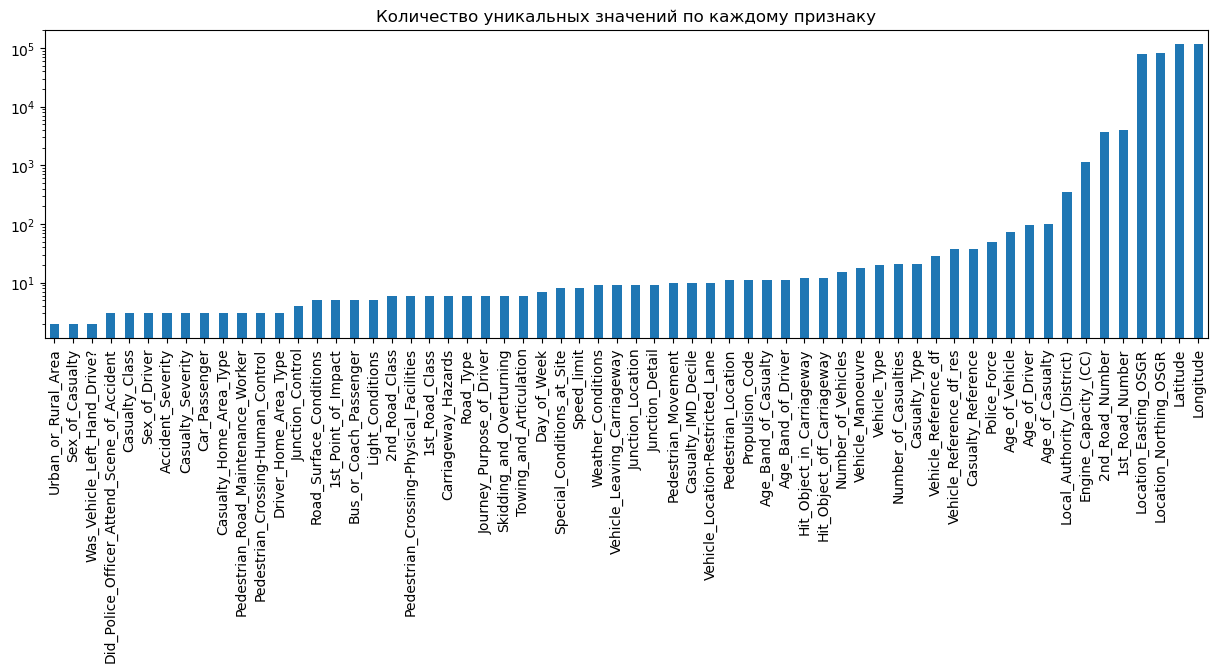

In [10]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Количество уникальных значений по каждому признаку");

In [11]:
n_duplicates = df.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"Количество дублей: {n_duplicates}.")

Количество дублей: 22.


In [12]:
columns_to_consider = df.drop(labels=["Accident_Index"], axis=1).columns

df = df.drop_duplicates(subset=columns_to_consider)
df.shape

(363221, 67)

Text(0, 0.5, 'Номер строки')

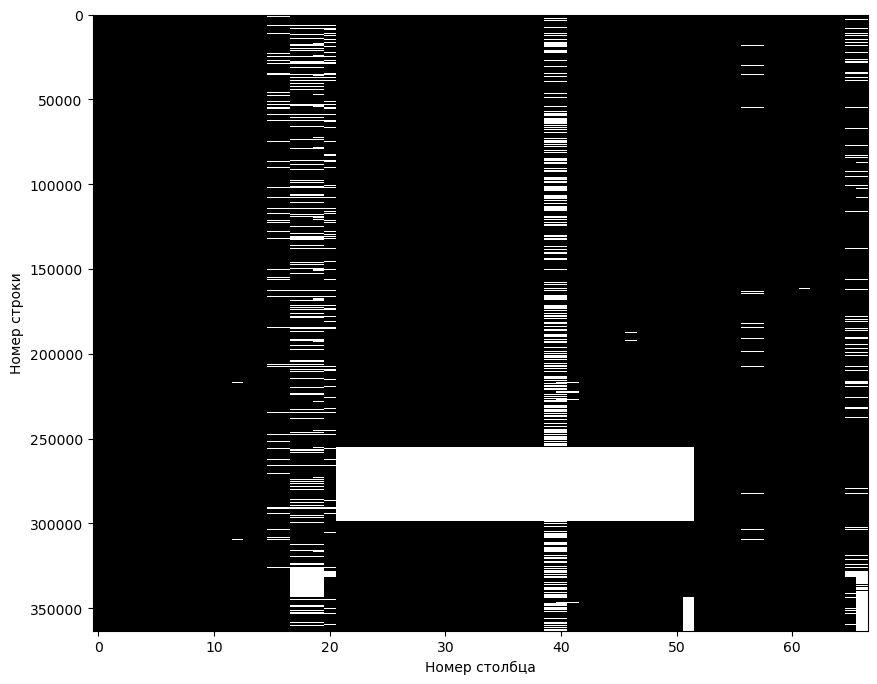

In [13]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Номер столбца")
plt.ylabel("Номер строки")

In [25]:
msno.matrix(df, labels=True, sort="descending")

MemoryError: Unable to allocate 169. MiB for an array with shape (22154648,) and data type int64

In [ ]:
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

<Axes: title={'center': 'Доля пропусков по каждому признаку'}, ylabel='Доля пропусков'>

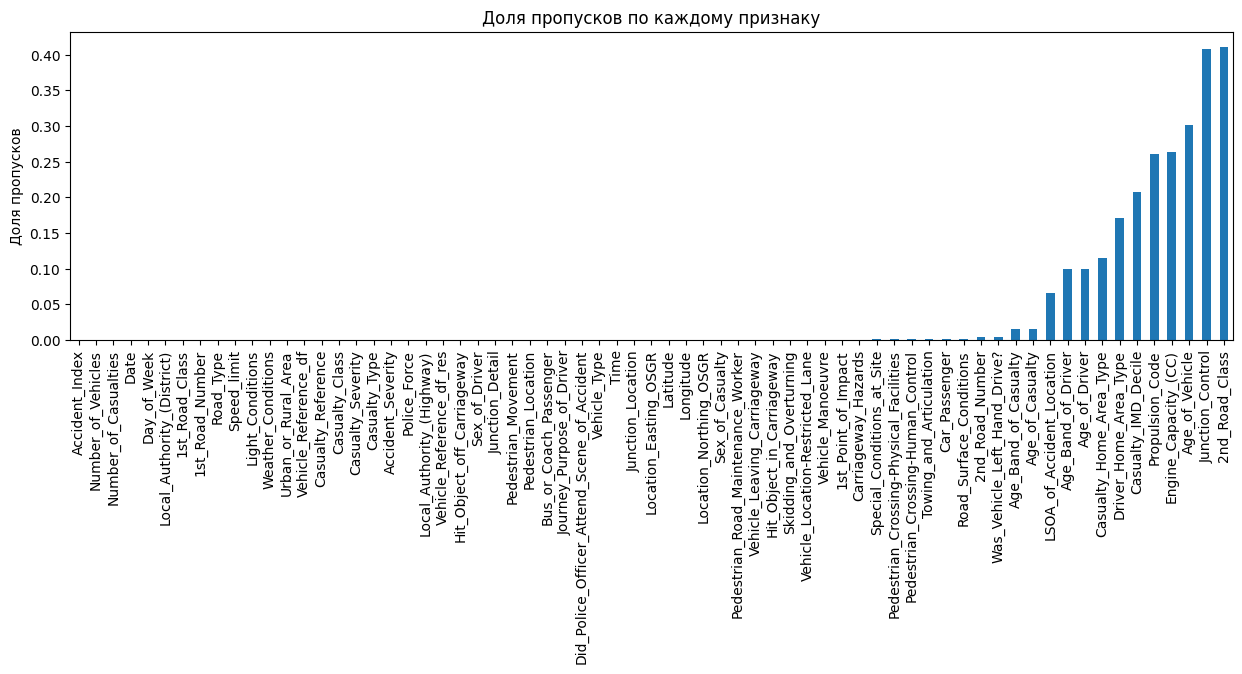

In [ ]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Доля пропусков по каждому признаку",
    ylabel="Доля пропусков")

In [ ]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
df.shape

(319790, 60)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

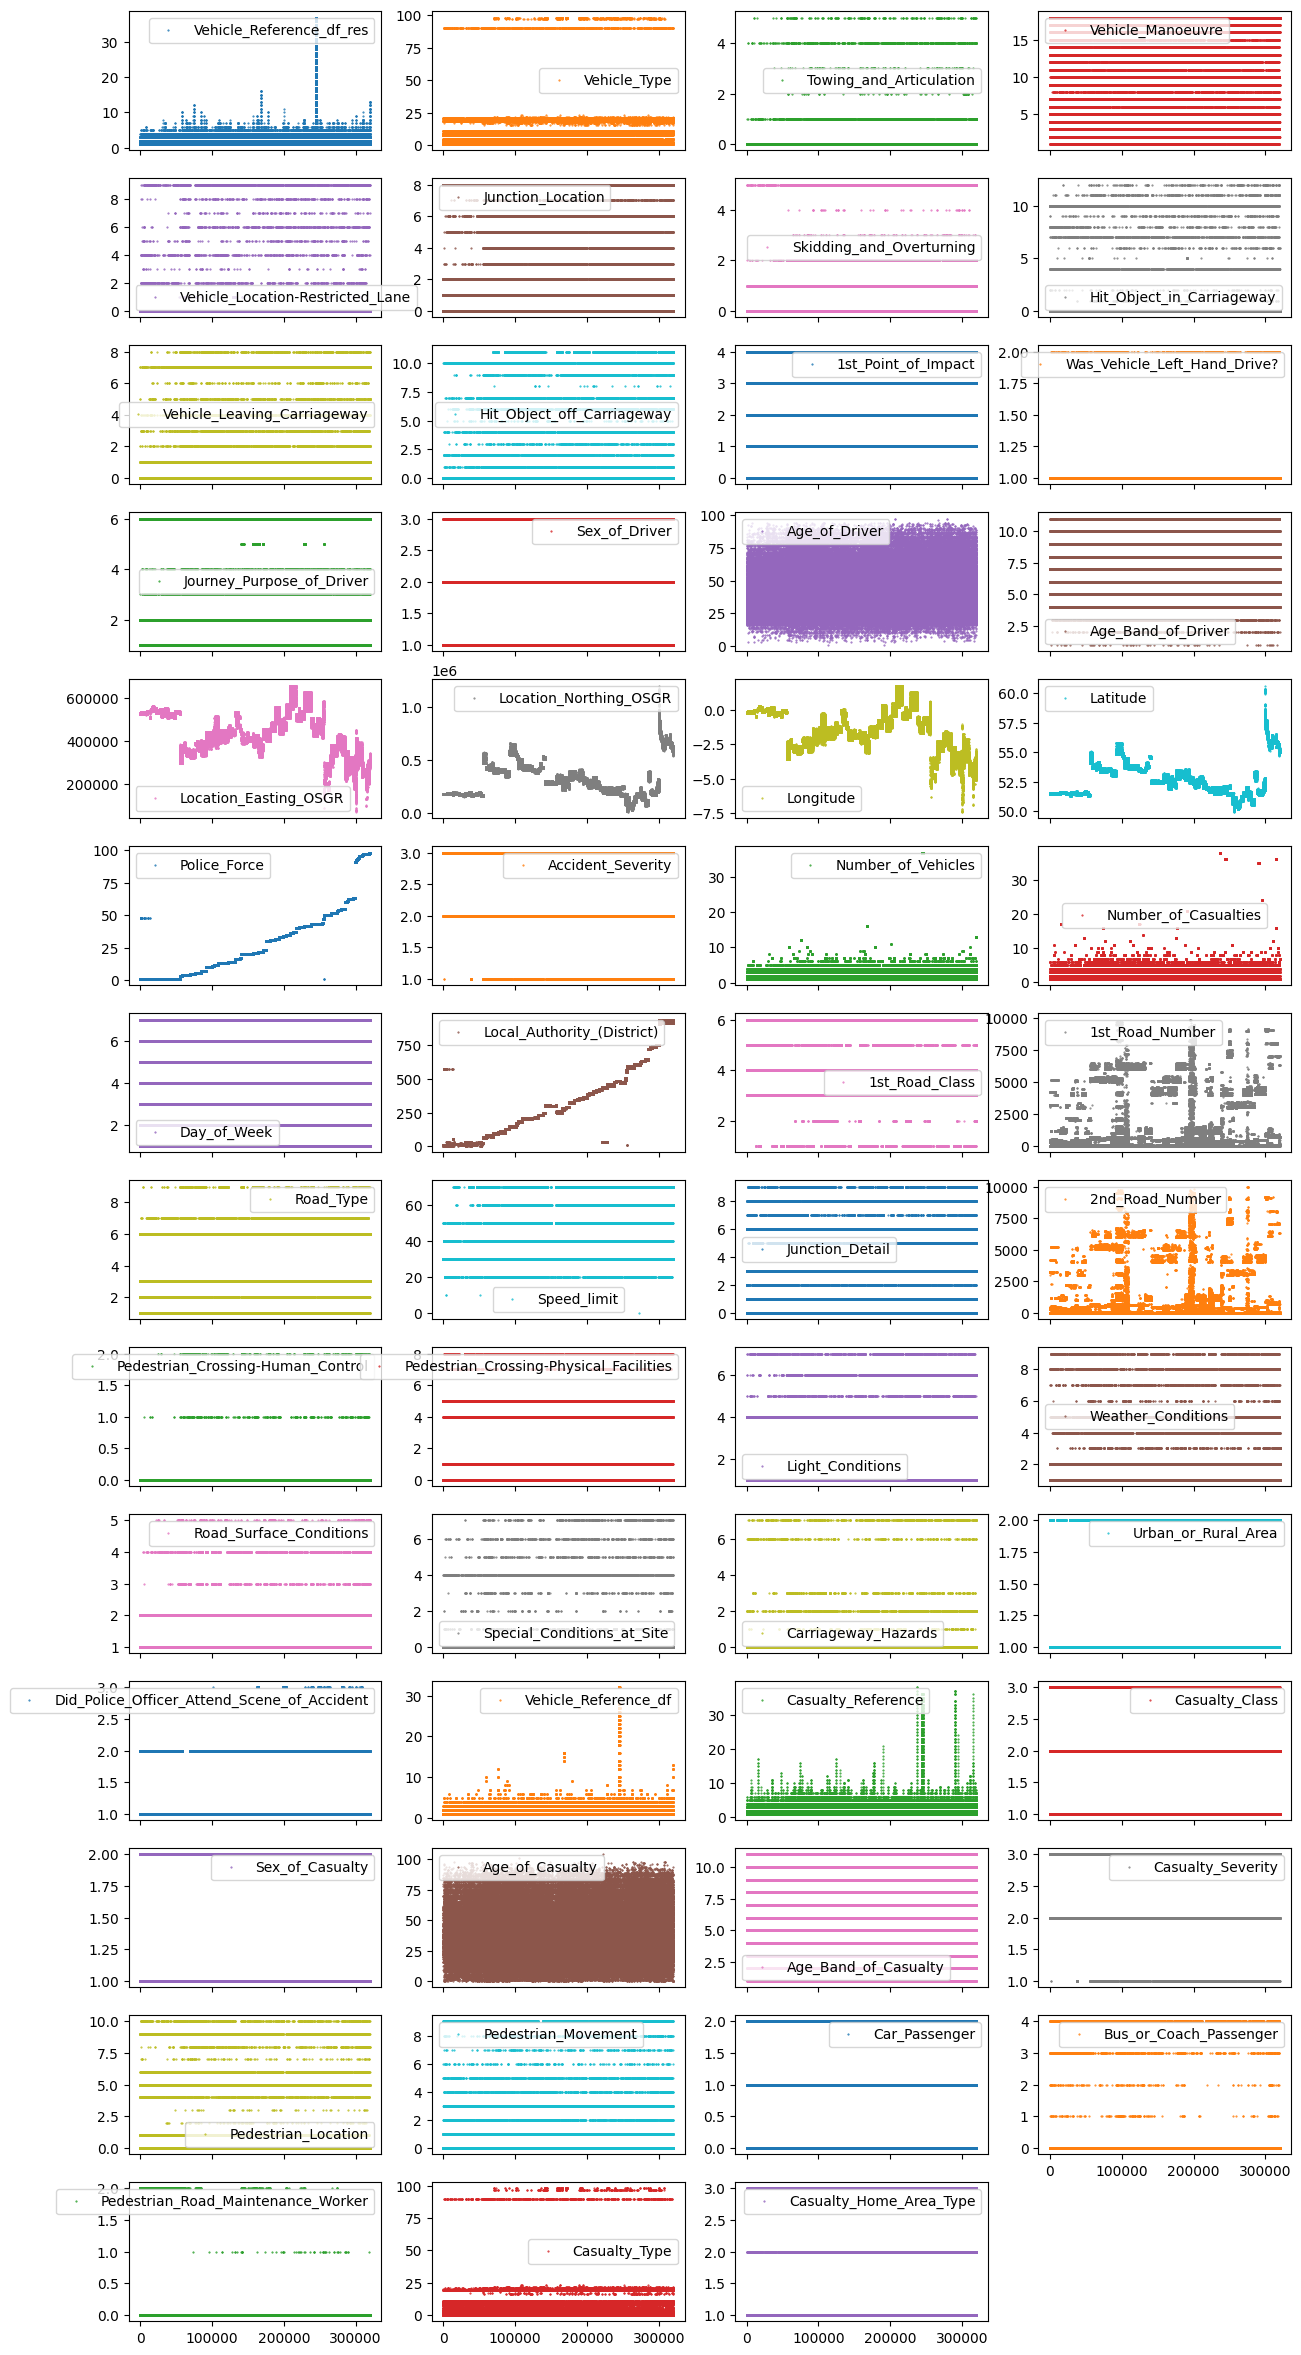

In [ ]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1)
plt.show()

In [ ]:
df.describe(exclude=["number", "datetime"])

,Accident_Index,Age_of_Driver,Age_Band_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location,Casualty_Home_Area_Type
count,319790,287764.0,287764.0,319790,319746,319790,298693,283238.0
unique,123645,95.0,11.0,365,1439,204,25977,3.0
top,201543P296025,30.0,6.0,14/02/2015,17:30,E10000017,E01028497,1.0
freq,1332,8195.0,67349.0,2144,2969,8457,1456,226905.0


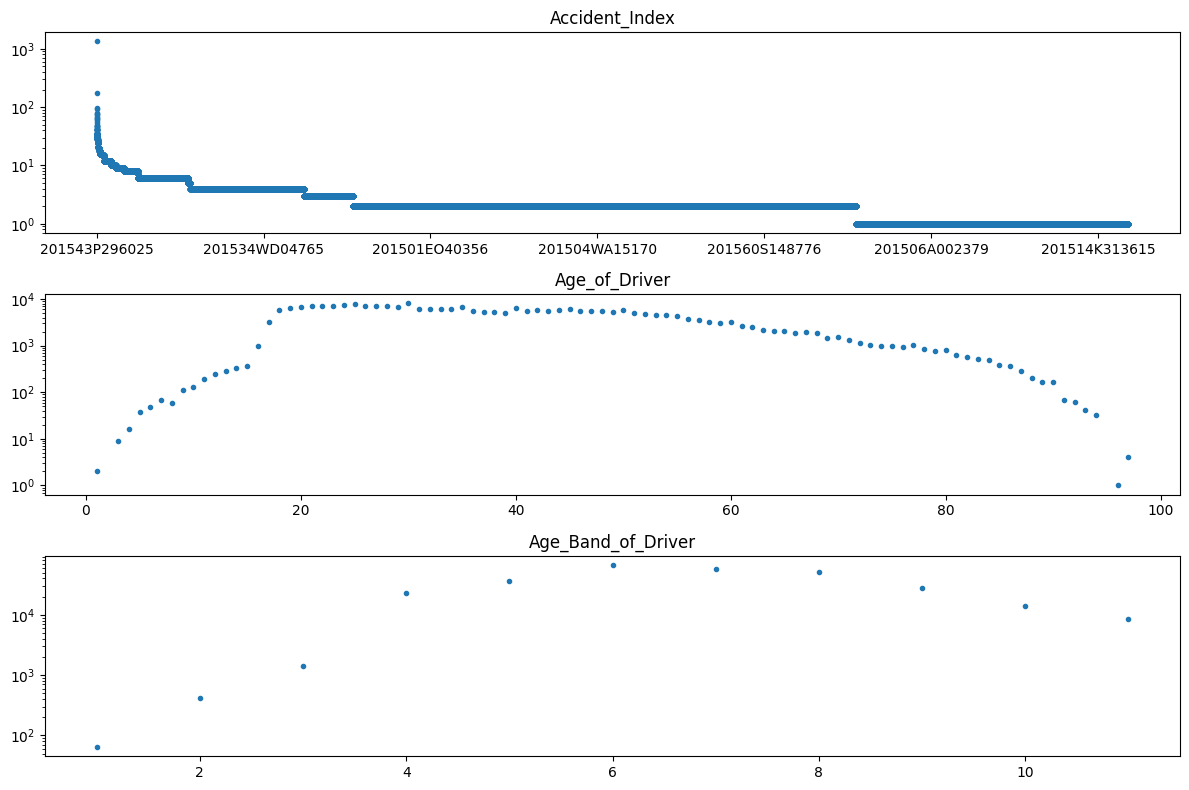

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    df_non_numerical[col].value_counts().plot(

        logy=True, title=col, lw=0, marker=".", ax=ax)

plt.tight_layout()

In [ ]:
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

df = df[~df["Accident_Index"].isin(accident_ids)]
df.shape

(317665, 60)

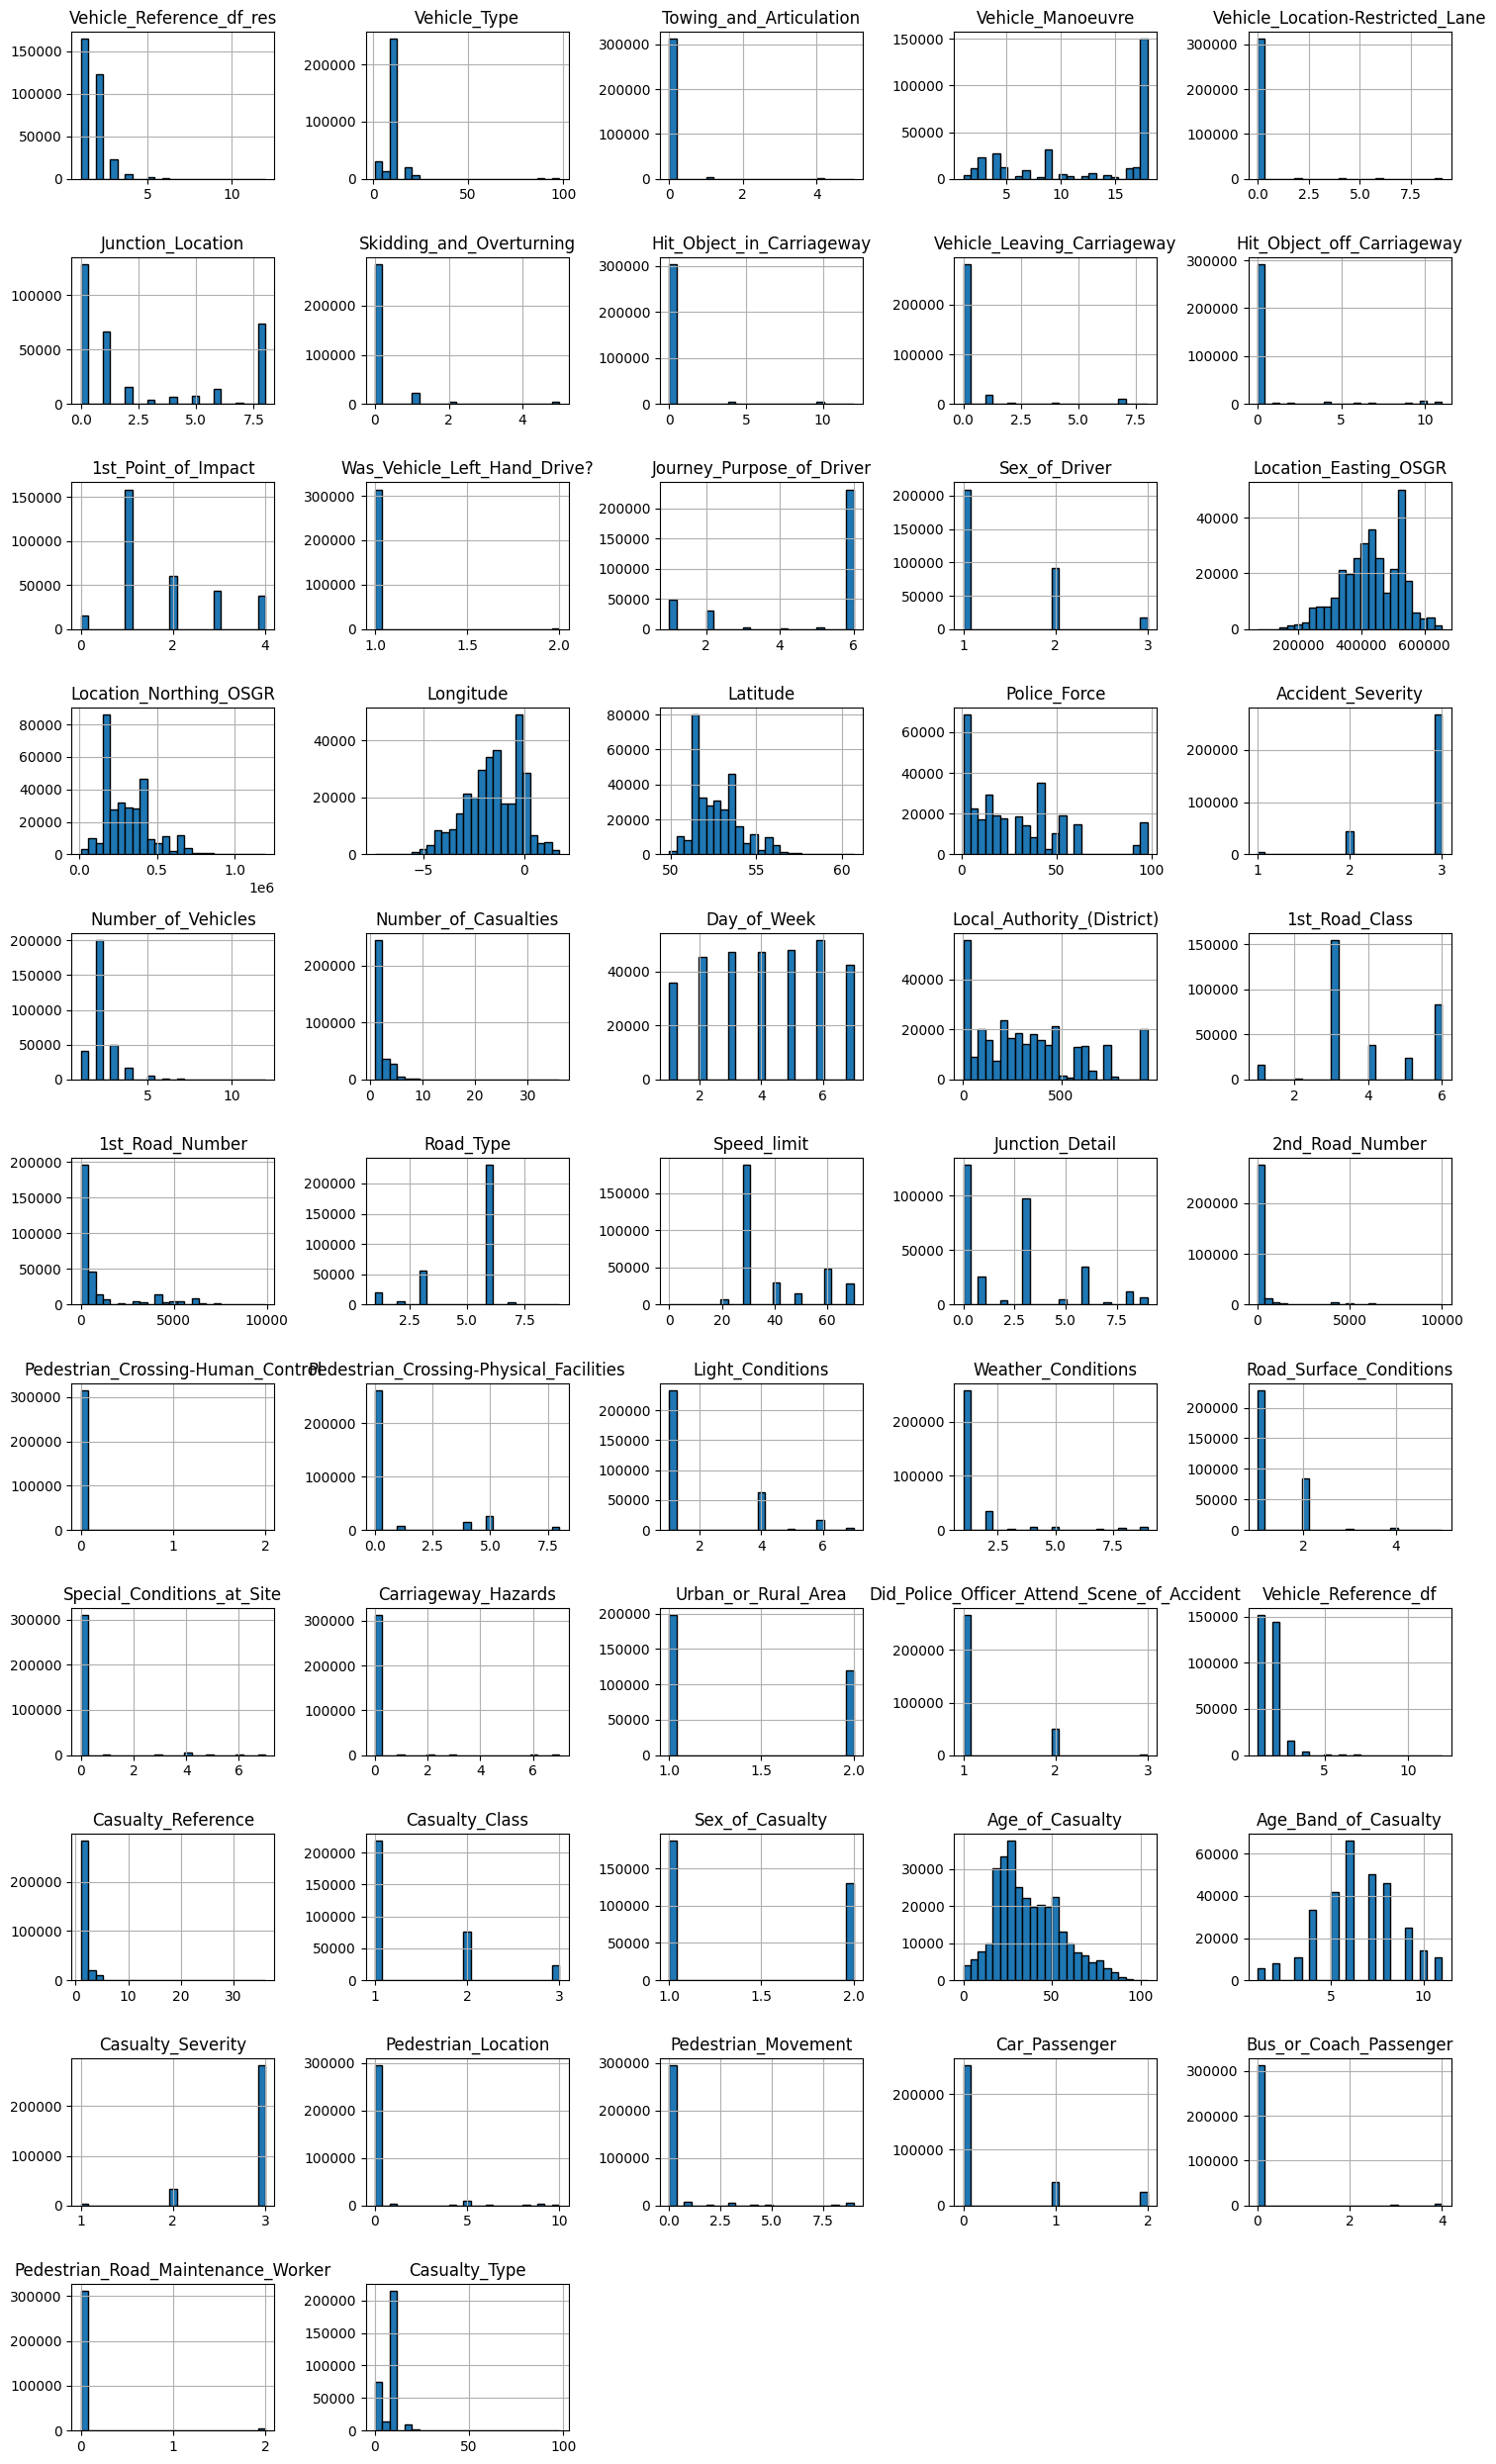

In [ ]:
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

<Axes: >

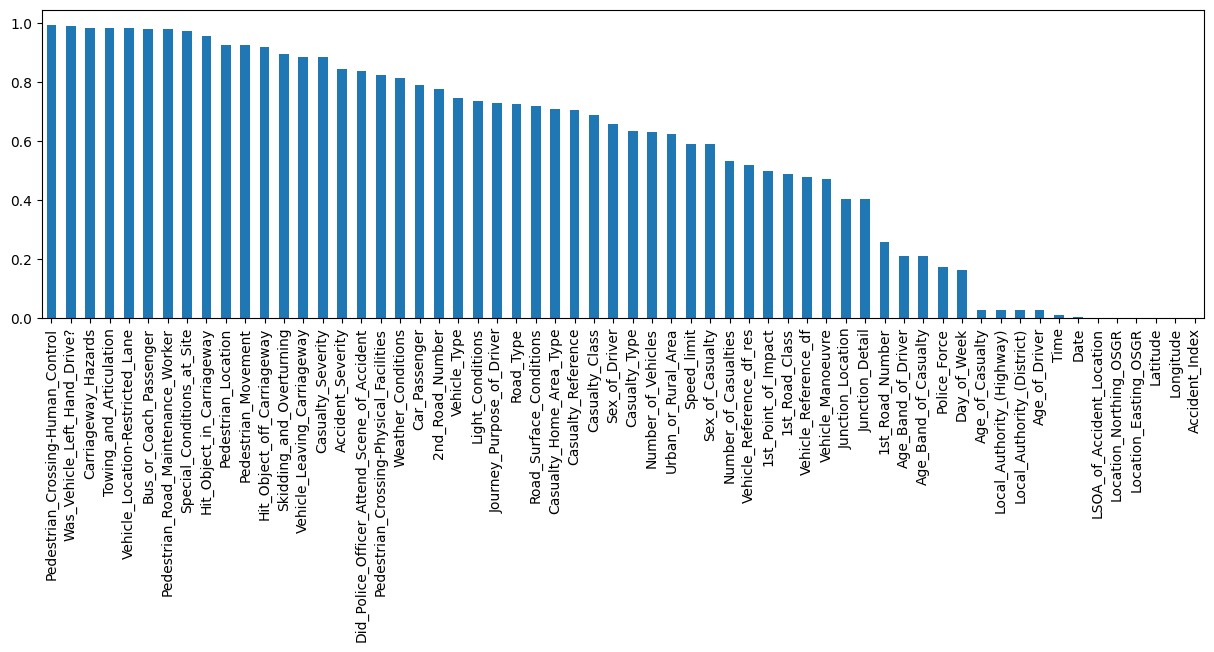

In [ ]:
most_frequent_entry = df.mode()

df_freq = df.eq(most_frequent_entry.values, axis=1)

df_freq = df_freq.mean().sort_values(ascending=False)

display(df_freq.head())

df_freq.plot.bar(figsize=(15, 4))

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

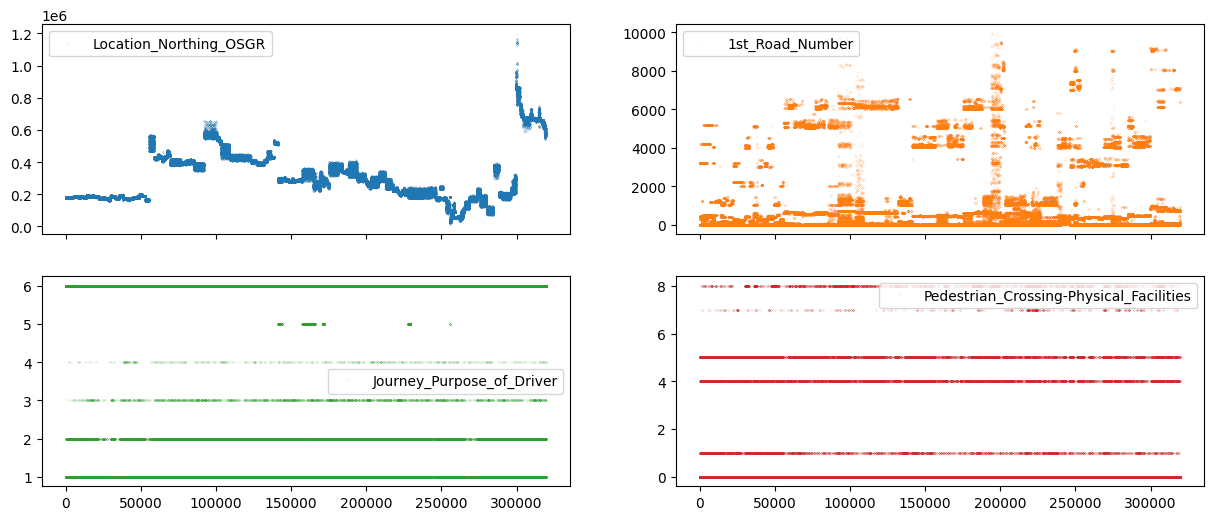

In [ ]:
df[["Location_Northing_OSGR", "1st_Road_Number",
      "Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6))

In [ ]:
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

In [ ]:
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(317665, 10)

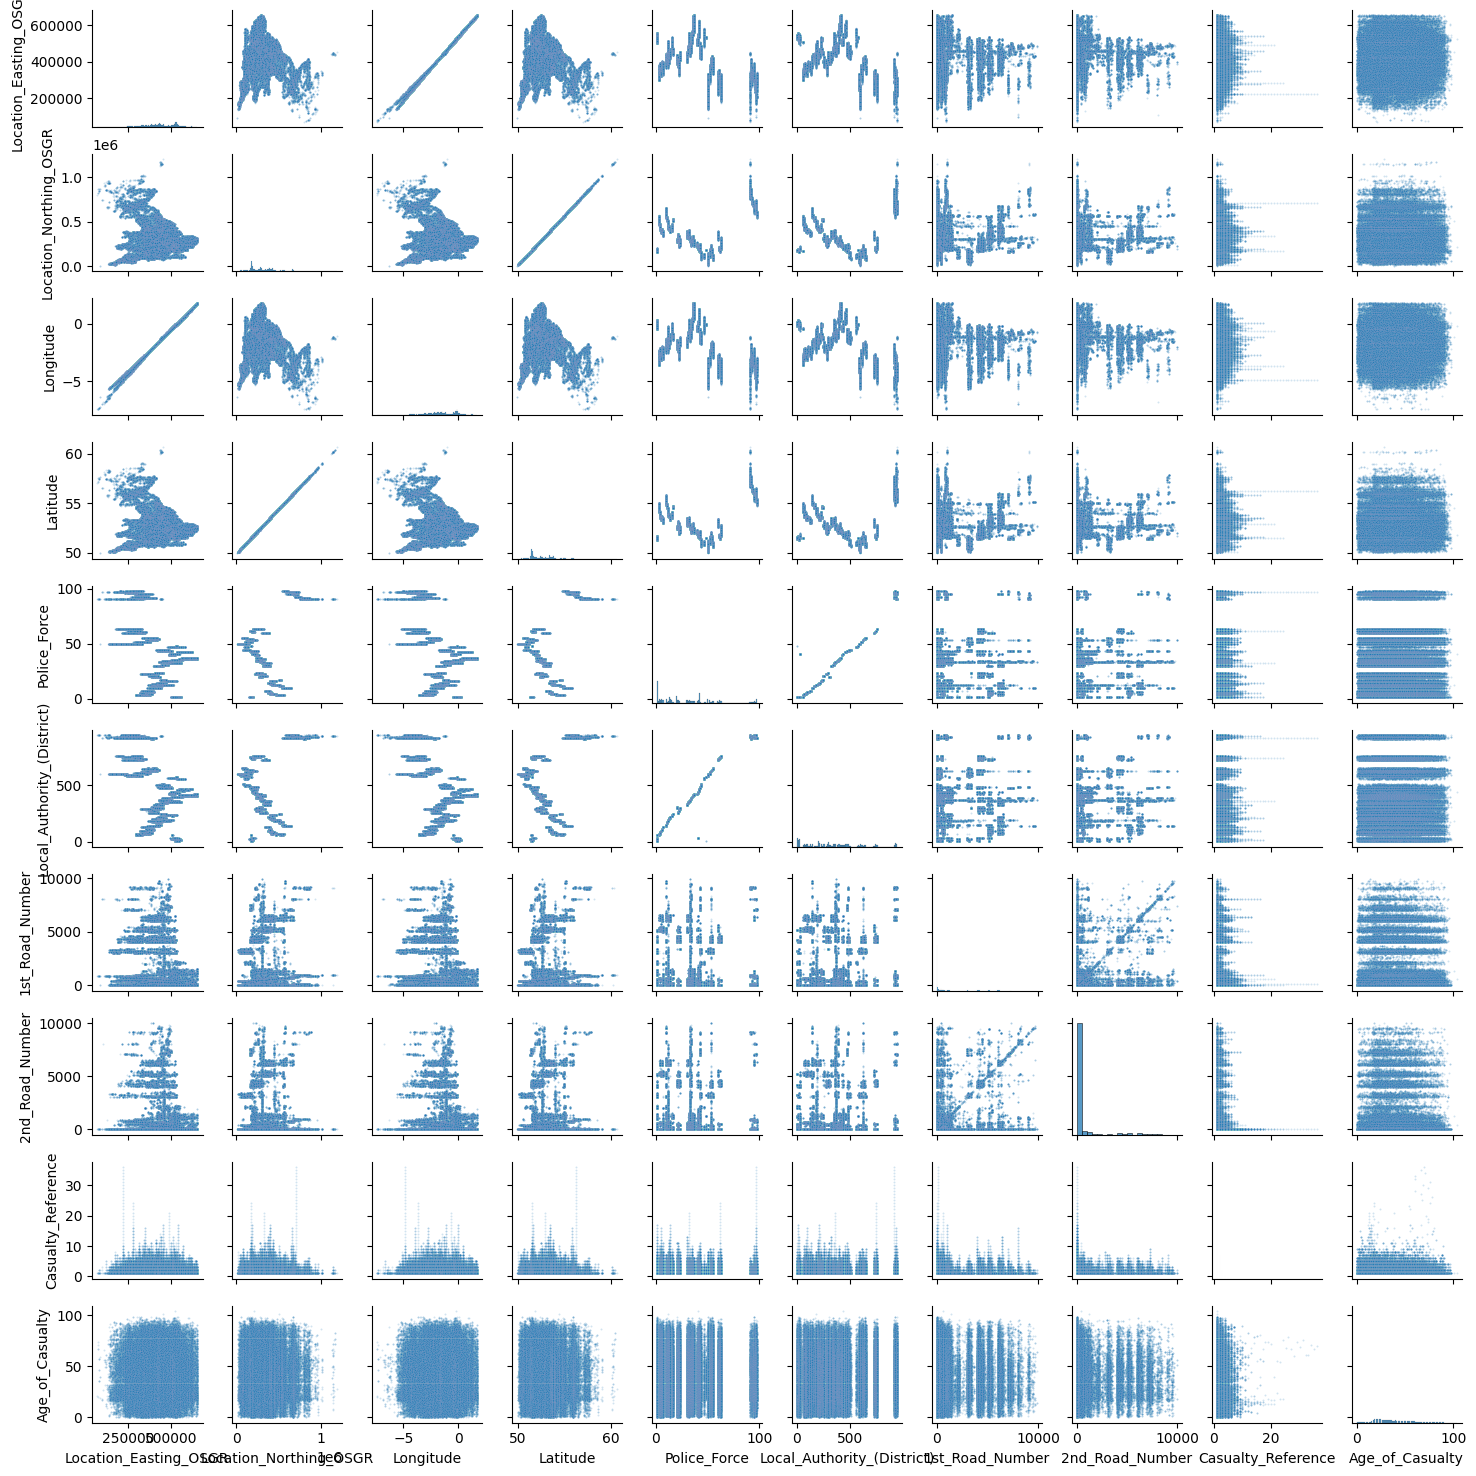

In [ ]:
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2})

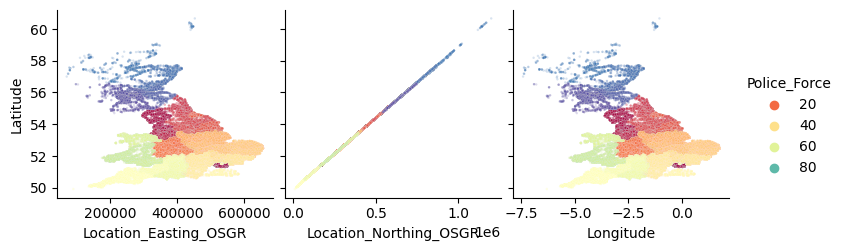

In [ ]:
sns.pairplot(
    df, plot_kws={"s": 3, "alpha": 0.2}, hue="Police_Force", palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude")

In [ ]:
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 42)

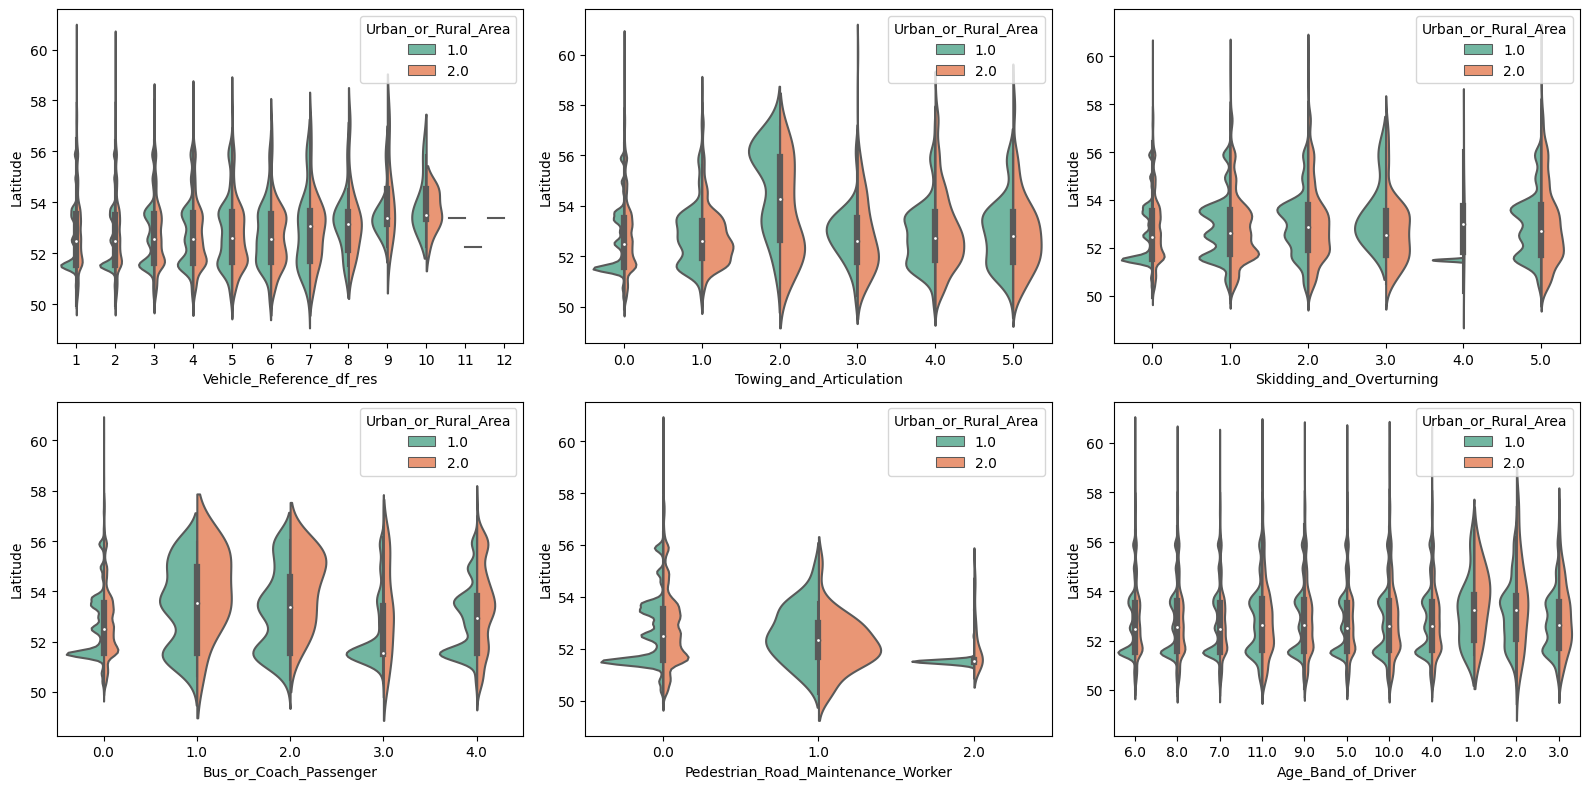

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout()

In [ ]:
df_corr = df.corr(method="pearson")

<ipython-input-31-a0d41864fa8e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method="pearson")


<Axes: >

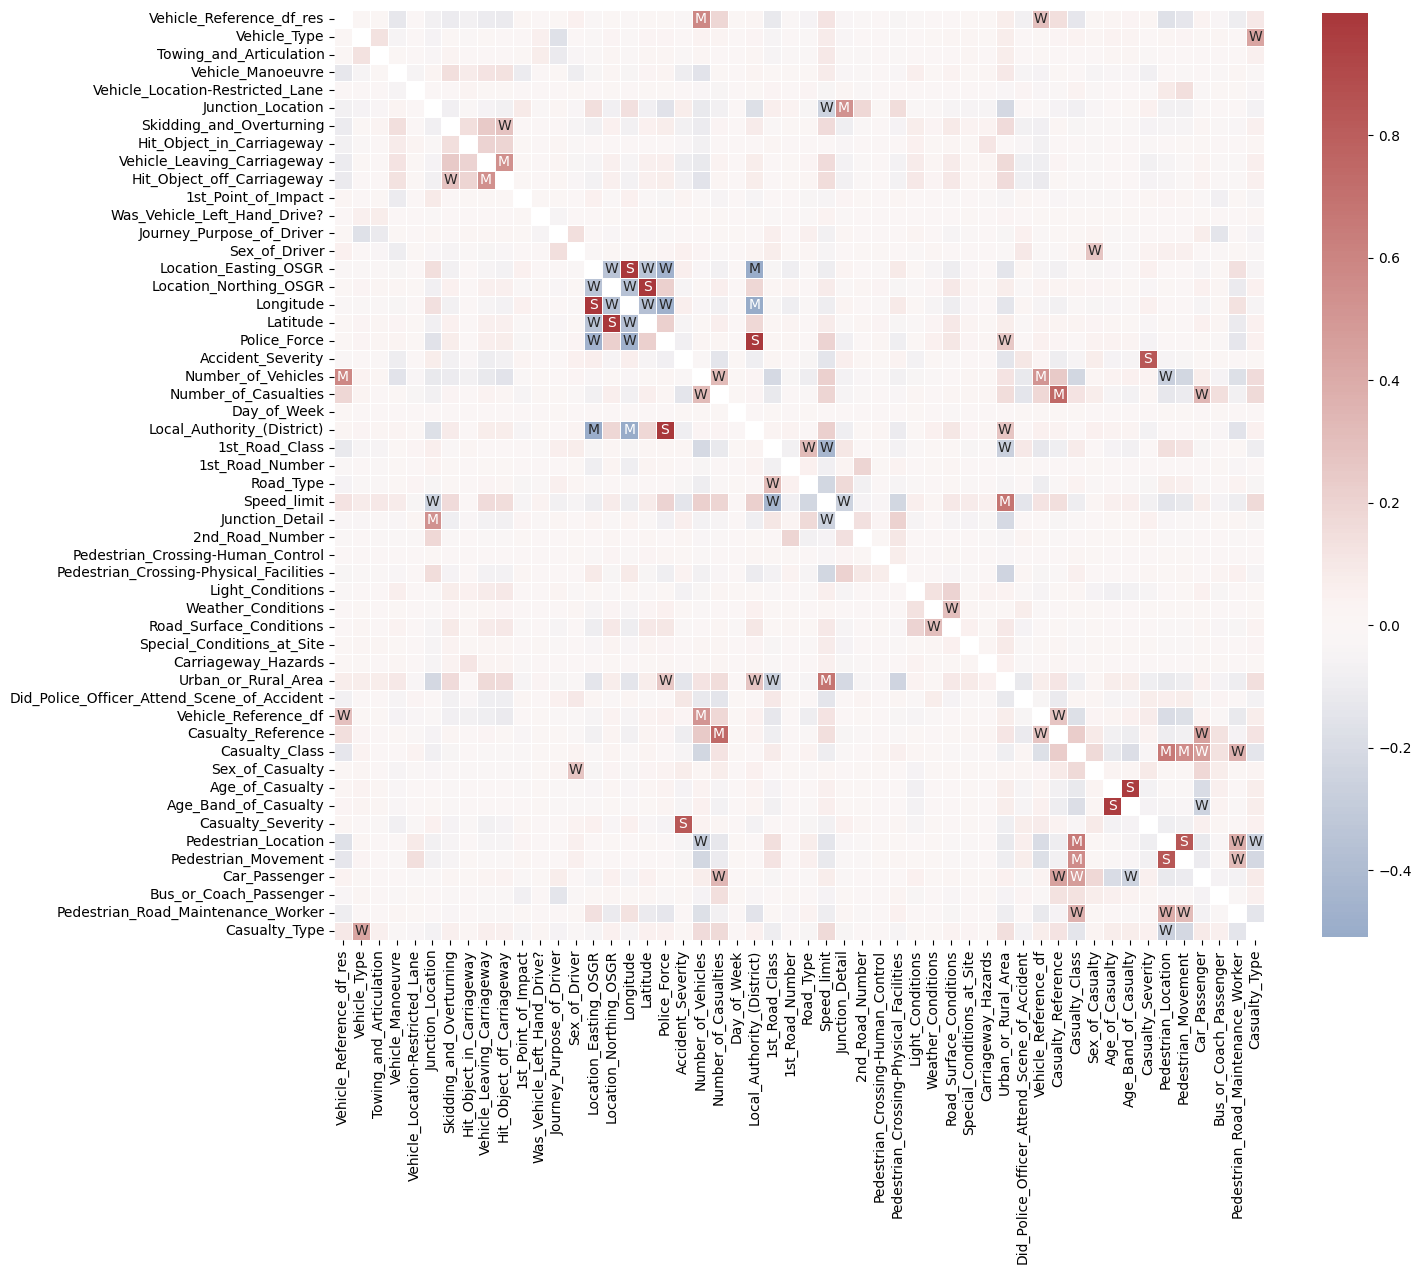

In [ ]:
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [ ]:
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

df_corr_stacked

Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Pedestrian_Movement         Pedestrian_Location       0.837884
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1326, dtype: float64